In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Import and Omit N/a

In [5]:
cnn_covid = pd.read_csv (r'C:\Users\zach\cnnspider.csv')
cnn_covid.dropna(inplace = True)
cnn_covid.head()

,title,byline,time,content
0,Justice Department charges 5 people with helpi...,"By Katelyn Polantz , Kara Scannell and Han...","Updated 4:41 PM ET, Wed March 16, 2022",(CNN) The Justice Department has charged five...
1,White House will unveil new data-sharing initi...,"By John Harwood , CNN","Updated 5:09 AM ET, Tue March 15, 2022","(CNN) The Biden White House , trying to expa..."
2,Why 'Turning Red' gives me hope,Opinion by Vanessa Hua,"Updated 4:21 PM ET, Wed March 16, 2022",Vanessa Hua is the author of the forthcoming ...
3,"5 things to know for March 16: Ukraine, Pandem...","By Alexandra Meeks, CNN","Updated 6:44 AM ET, Wed March 16, 2022",Get '5 Things' in your inbox If your day doesn...
4,Senate votes to repeal travel mask mandates in...,"By Ali Zaslav and Ted Barrett , CNN","Updated 7:16 PM ET, Tue March 15, 2022",(CNN) The Senate on Tuesday passed a resoluti...


Formatting Dates

In [6]:
cnn_covid['date'] = cnn_covid['time'].apply(lambda x: x.split('ET,')[1][4:].strip())
cnn_covid.date = pd.to_datetime(cnn_covid.date, format = '%B %d, %Y')

cnn_covid.head()

,title,byline,time,content,date
0,Justice Department charges 5 people with helpi...,"By Katelyn Polantz , Kara Scannell and Han...","Updated 4:41 PM ET, Wed March 16, 2022",(CNN) The Justice Department has charged five...,2022-03-16
1,White House will unveil new data-sharing initi...,"By John Harwood , CNN","Updated 5:09 AM ET, Tue March 15, 2022","(CNN) The Biden White House , trying to expa...",2022-03-15
2,Why 'Turning Red' gives me hope,Opinion by Vanessa Hua,"Updated 4:21 PM ET, Wed March 16, 2022",Vanessa Hua is the author of the forthcoming ...,2022-03-16
3,"5 things to know for March 16: Ukraine, Pandem...","By Alexandra Meeks, CNN","Updated 6:44 AM ET, Wed March 16, 2022",Get '5 Things' in your inbox If your day doesn...,2022-03-16
4,Senate votes to repeal travel mask mandates in...,"By Ali Zaslav and Ted Barrett , CNN","Updated 7:16 PM ET, Tue March 15, 2022",(CNN) The Senate on Tuesday passed a resoluti...,2022-03-15


Cleaning articles of unessecary content like embedded javascript, etc.

In [7]:
cnn_covid['content'] = cnn_covid['content'].apply(lambda x: x.lower())
cnn_covid.content = cnn_covid.content.apply(lambda x: re.sub(r'use\sstrict.*?env=prod"}', '', x))

Adding month_year column

In [8]:
cnn_covid['month_year'] = pd.to_datetime(cnn_covid['date']).dt.to_period('M')
cnn_covid.head()

,title,byline,time,content,date,month_year
0,Justice Department charges 5 people with helpi...,"By Katelyn Polantz , Kara Scannell and Han...","Updated 4:41 PM ET, Wed March 16, 2022",(cnn) the justice department has charged five...,2022-03-16,2022-03
1,White House will unveil new data-sharing initi...,"By John Harwood , CNN","Updated 5:09 AM ET, Tue March 15, 2022","(cnn) the biden white house , trying to expa...",2022-03-15,2022-03
2,Why 'Turning Red' gives me hope,Opinion by Vanessa Hua,"Updated 4:21 PM ET, Wed March 16, 2022",vanessa hua is the author of the forthcoming ...,2022-03-16,2022-03
3,"5 things to know for March 16: Ukraine, Pandem...","By Alexandra Meeks, CNN","Updated 6:44 AM ET, Wed March 16, 2022",get '5 things' in your inbox if your day doesn...,2022-03-16,2022-03
4,Senate votes to repeal travel mask mandates in...,"By Ali Zaslav and Ted Barrett , CNN","Updated 7:16 PM ET, Tue March 15, 2022",(cnn) the senate on tuesday passed a resoluti...,2022-03-15,2022-03


Checking month day ocurrences for making the timeframes the same between datasets

Text(0, 0.5, 'count')

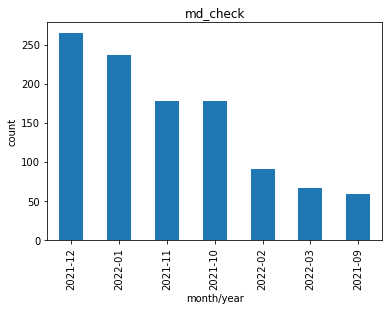

In [9]:
md_check = cnn_covid['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

selecting dates to makes timeframes in datasets equal

In [10]:
cnn_covid.set_index('month_year').head()

,title,byline,time,content,date
month_year,,,,,
2022-03,Justice Department charges 5 people with helpi...,"By Katelyn Polantz , Kara Scannell and Han...","Updated 4:41 PM ET, Wed March 16, 2022",(cnn) the justice department has charged five...,2022-03-16
2022-03,White House will unveil new data-sharing initi...,"By John Harwood , CNN","Updated 5:09 AM ET, Tue March 15, 2022","(cnn) the biden white house , trying to expa...",2022-03-15
2022-03,Why 'Turning Red' gives me hope,Opinion by Vanessa Hua,"Updated 4:21 PM ET, Wed March 16, 2022",vanessa hua is the author of the forthcoming ...,2022-03-16
2022-03,"5 things to know for March 16: Ukraine, Pandem...","By Alexandra Meeks, CNN","Updated 6:44 AM ET, Wed March 16, 2022",get '5 things' in your inbox if your day doesn...,2022-03-16
2022-03,Senate votes to repeal travel mask mandates in...,"By Ali Zaslav and Ted Barrett , CNN","Updated 7:16 PM ET, Tue March 15, 2022",(cnn) the senate on tuesday passed a resoluti...,2022-03-15


Selecting dates to makes timeframes in datasets equal

In [11]:
cnn_covid_cleaned = cnn_covid[cnn_covid['month_year'].between('2021-12' , '2022-03')].copy()
cnn_covid_cleaned.head()

,title,byline,time,content,date,month_year
0,Justice Department charges 5 people with helpi...,"By Katelyn Polantz , Kara Scannell and Han...","Updated 4:41 PM ET, Wed March 16, 2022",(cnn) the justice department has charged five...,2022-03-16,2022-03
1,White House will unveil new data-sharing initi...,"By John Harwood , CNN","Updated 5:09 AM ET, Tue March 15, 2022","(cnn) the biden white house , trying to expa...",2022-03-15,2022-03
2,Why 'Turning Red' gives me hope,Opinion by Vanessa Hua,"Updated 4:21 PM ET, Wed March 16, 2022",vanessa hua is the author of the forthcoming ...,2022-03-16,2022-03
3,"5 things to know for March 16: Ukraine, Pandem...","By Alexandra Meeks, CNN","Updated 6:44 AM ET, Wed March 16, 2022",get '5 things' in your inbox if your day doesn...,2022-03-16,2022-03
4,Senate votes to repeal travel mask mandates in...,"By Ali Zaslav and Ted Barrett , CNN","Updated 7:16 PM ET, Tue March 15, 2022",(cnn) the senate on tuesday passed a resoluti...,2022-03-15,2022-03


Exporting cleaned data to join with other cnn data to make wordclouds

In [14]:
cnn_covid_cleaned.to_csv (r'C:\Users\zach\cnn_covid_cleaned.csv', header=True)

Verifying the correct period of time was selected

Text(0, 0.5, 'count')

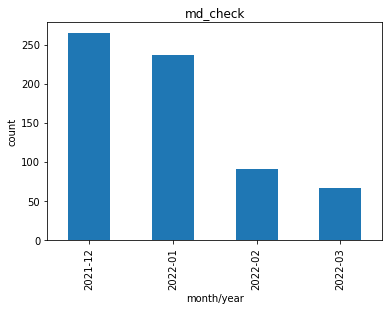

In [12]:
md_check2 = cnn_covid_cleaned['month_year'].value_counts().plot(kind='bar')
md_check2.set_title("md_check")
md_check2.set_xlabel("month/year")
md_check2.set_ylabel("count")